In [1]:
import numpy as np
import matplotlib as plt
from sklearn.utils import shuffle
from pyrap.tables import table as tbl
import numpy as np
import pickle
import pylab
import sys
from sklearn.preprocessing import StandardScaler
import time as time
from scipy import stats
from sklearn.cross_validation import train_test_split
import astropy
from astropy.time import Time

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import casacore


In [3]:
import matplotlib.pylab as plt

In [4]:

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
#filename
def Decision_test(filename):
    start=time.time()
    Decision_gain=Decision_tree.predict(filename)
    T=time.time()-start
    return Decision_gain,T

def Random_test(filename):
    start=time.time()
    Random_gain=Random_forest.predict(filename)
    T=time.time()-start
    return Random_gain,T

def KNN_test(filename):
    start=time.time()
    KNN_gain=KNN.predict(filename)
    T=time.time()-start
    return KNN_gain,T

def EXT_test(filename):
    start=time.time()
    EXT_gain=Random_forest.predict(filename)
    T=time.time()-start
    return EXT_gain,T


In [6]:
scaler=np.loadtxt('scale.csv',delimiter=',',skiprows=1)

In [7]:
#Load mean and standard deviation from scaler.csv
Mean=scaler[0]
STD=scaler[1]


In [9]:
#Sensor data from new observations 
#Sensor_Matrix1371996287.csv,1371996287_1666 less sensor than sols
#Sensor_Matrix1324010080.csv,1324010080_1822
#Sensor_Matrix1329697773.csv,1329697773_1822
#1340021015_1822.full_pol.fluxscale1/, Sensor_Matrix.csv
#Sensor_Matrix1324619115.csv,1324619115_1822 #missed data
data=np.loadtxt('Sensor_Matrix1324010080.csv',delimiter=',',skiprows=1)
data1=np.loadtxt('Sensor_Matrix1329697773.csv',delimiter=',',skiprows=1)
data2=np.loadtxt('Sensor_Matrix.csv',delimiter=',',skiprows=1)
#Data=Myscale.fit_transform(data)




In [8]:
data.shape

NameError: name 'data' is not defined

In [10]:
Scaled_data=(data-Mean)/STD
Scaled_data1=(data1-Mean)/STD
Scaled_data2=(data2-Mean)/STD

In [11]:
Validation_scales= np.vstack((Scaled_data,Scaled_data1,Scaled_data2))

# Load fluxscale .ms file

In [84]:
#MS file for Gain Solutions (AMP & PHASE)
MSfile='1371996287_1666.full_pol.fluxscale1' #Still calibrating 
#open MS file
t = tbl(MSfile)
# get the time column from the main table
Timestamps = t.getcol("TIME")
print "Done with Time"


Successful readonly open of default-locked table 1371996287_1666.full_pol.fluxscale1: 13 columns, 392 rows
Done with Time


In [85]:
Gsolutions = t.getcol("CPARAM")

#Extracting HH and VV solutions 
GsolutionsHH=Gsolutions[:,0,0]
GsolutionsVV=Gsolutions[:,0,1]

Ant1HH,Ant1VV,Ant2HH,Ant2VV,Ant3HH,Ant3VV,Ant4HH,Ant4VV,Ant5HH,Ant5VV,Ant6HH,Ant6VV,Ant7HH,Ant7VV=[],[],[],[],[],[],[],[],[],[],[],[],[],[]


#loop appending solutions per antenna
i=0
while i < len(GsolutionsHH):
        Ant1HH.append(GsolutionsHH[i])
        Ant1VV.append(GsolutionsVV[i])
        Ant2HH.append(GsolutionsHH[i+1])
        Ant2VV.append(GsolutionsVV[i+1])
        Ant3HH.append(GsolutionsHH[i+2])
        Ant3VV.append(GsolutionsVV[i+2])
        Ant4HH.append(GsolutionsHH[i+3])
        Ant4VV.append(GsolutionsVV[i+3])
        Ant5HH.append(GsolutionsHH[i+4])
        Ant5VV.append(GsolutionsVV[i+4])
        Ant6HH.append(GsolutionsHH[i+5])
        Ant6VV.append(GsolutionsVV[i+5])
        Ant7HH.append(GsolutionsHH[i+6])
        Ant7VV.append(GsolutionsVV[i+6])
        i=i+7

                                                                                    
#Gain Amplitude per Antenna 
AmpHH1=np.abs(Ant1HH)
AmpVV1=np.abs(Ant1VV)
AmpHH2=np.abs(Ant2HH)
AmpVV2=np.abs(Ant2VV)
AmpHH3=np.abs(Ant3HH)
AmpVV3=np.abs(Ant3VV)
AmpHH4=np.abs(Ant4HH)
AmpVV4=np.abs(Ant4VV)
AmpHH5=np.abs(Ant5HH)
AmpVV5=np.abs(Ant5VV)
AmpHH6=np.abs(Ant6HH)
AmpVV6=np.abs(Ant6VV)
AmpHH7=np.abs(Ant7HH)
AmpVV7=np.abs(Ant7VV)


#Gain Phase  Per Antenna 
phaseHH1=np.angle(Ant1HH,deg=True)
phaseVV1=np.angle(Ant1VV,deg=True)
phaseHH2=np.angle(Ant2HH,deg=True)
phaseVV2=np.angle(Ant2VV,deg=True)
phaseHH3=np.angle(Ant3HH,deg=True)
phaseVV3=np.angle(Ant3VV,deg=True)
phaseHH4=np.angle(Ant4HH,deg=True)
phaseVV4=np.angle(Ant4VV,deg=True)
phaseHH5=np.angle(Ant5HH,deg=True)
phaseVV5=np.angle(Ant5VV,deg=True)
phaseHH6=np.angle(Ant6HH,deg=True)
phaseVV6=np.angle(Ant6VV,deg=True)
phaseHH7=np.angle(Ant7HH,deg=True)
phaseVV7=np.angle(Ant7VV,deg=True)

Matrix1=np.matrix([AmpHH1,phaseHH1,AmpHH2,phaseHH2,AmpHH3,phaseHH3,AmpHH4,phaseHH4,AmpHH5,phaseHH5,AmpHH6,phaseHH6,AmpHH7,phaseHH7,
                  AmpVV1,phaseVV1,AmpVV2,phaseVV2,AmpVV3,phaseVV3,AmpVV4,phaseVV4,AmpVV5,phaseVV5,AmpVV6,phaseVV6,AmpVV7,phaseVV7])


#Matrix1=np.matrix([AmpHH1[10:],phaseHH1[10:],AmpHH2[10:],phaseHH2[10:],AmpHH3[10:],phaseHH3[10:],AmpHH4[10:],phaseHH4[10:],AmpHH5[10:],phaseHH5[10:],AmpHH6[10:],phaseHH6[10:],AmpHH7[10:],phaseHH7[10:],
#                  AmpVV1[10:],phaseVV1[10:],AmpVV2[10:],phaseVV2[10:],AmpVV3[10:],phaseVV3[10:],AmpVV4[10:],phaseVV4[10:],AmpVV5[10:],phaseVV5[10:],AmpVV6[10:],phaseVV6[10:],AmpVV7[10:],phaseVV7[10:]])

Matrix=Matrix1.transpose()

# Load Training matrix data

In [12]:

#Loading matrix data from .csv matrix
data=np.loadtxt('Train_Matrix.csv',delimiter=',',skiprows=1)

#Attaching index column to dada
IDX=np.arange(1,data.shape[0]+1) 
IDX1=np.matrix(IDX).transpose()
NewData=np.column_stack((IDX1,data))
Myscale=StandardScaler()
NewData[:,1:48]=Myscale.fit_transform(NewData[:,1:48]) 

   
X_Train,X_Test,Y_train,Y_test,=train_test_split(NewData[:,:48],NewData[:,48:76],test_size=0.2) 

In [13]:
Train=np.zeros((1,np.shape(X_Train)[0]))
Validate=np.ones((1,np.shape(Validation_scales)[0]))


In [14]:
S=np.matrix(Train).transpose()
S1=np.matrix(Validate).transpose()

In [15]:
New_Xtrain=np.column_stack((S,X_Train[:,1:]))
New_scaled_data= np.column_stack((S1,Validation_scales))

In [332]:
New_scaled_data.shape, New_Xtrain.shape


((332, 48), (1408, 48))

In [333]:
Data_combined=np.vstack((New_Xtrain,New_scaled_data))


In [334]:
Data_combined.shape

(1740, 48)

# Make scatter plot to check for distribution 

In [17]:
import pandas as pd

In [59]:

data_frame=pd.DataFrame(X_Train[:,6:], columns=["Ant1RefractionEL"
                  ,"Ant2refractionEL","Ant3refractionEL","Ant4refractionEL","Ant5refractionEL","Ant6refractionEL","Ant7refractionEL"
                  ,"Ant1PoitingEL","Ant2PoitingEL","Ant3PoitingEL","Ant4PoitingEL","Ant5PoitingEL","Ant6PoitingEL"
                  ,"Ant7PoitingEL","Ant1ScanEL","Ant2ScanEL","Ant3ScanEL","Ant4ScanEL","Ant5ScanEL","Ant6ScanEL"
                 ,"Ant7ScanEL","Ant1PointingAZ","Ant2PointingAZ","Ant3PointingAZ","Ant4PointingAZ","Ant5PointingAZ","Ant6PointingAZ"
                 ,"Ant7PointingAZ","Ant1refractionAZ","Ant2refractionAZ","Ant3refractionAZ","Ant4refractionAZ","Ant5refractionAZ","Ant6refractionAZ"
                 ,"Ant7refractionAZ","Ant1ScanAZ","Ant2ScanAZ","Ant3ScanAZ","Ant4ScanAZ","Ant5ScanAZ","Ant6ScanAZ"
                 ,"Ant7ScanAZ"])

In [20]:
data_f =pd.DataFrame(X_Train[:,1:6], columns=['Air-Temperature', 'Relative-humidity', 'Air-Pressure', 'Wind-direction','Wind-Speed'])

Index([u'Air-Temperature', u'Relative-humidity', u'Air-Pressure',
       u'Wind-direction', u'Wind-Speed'],
      dtype='object')

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


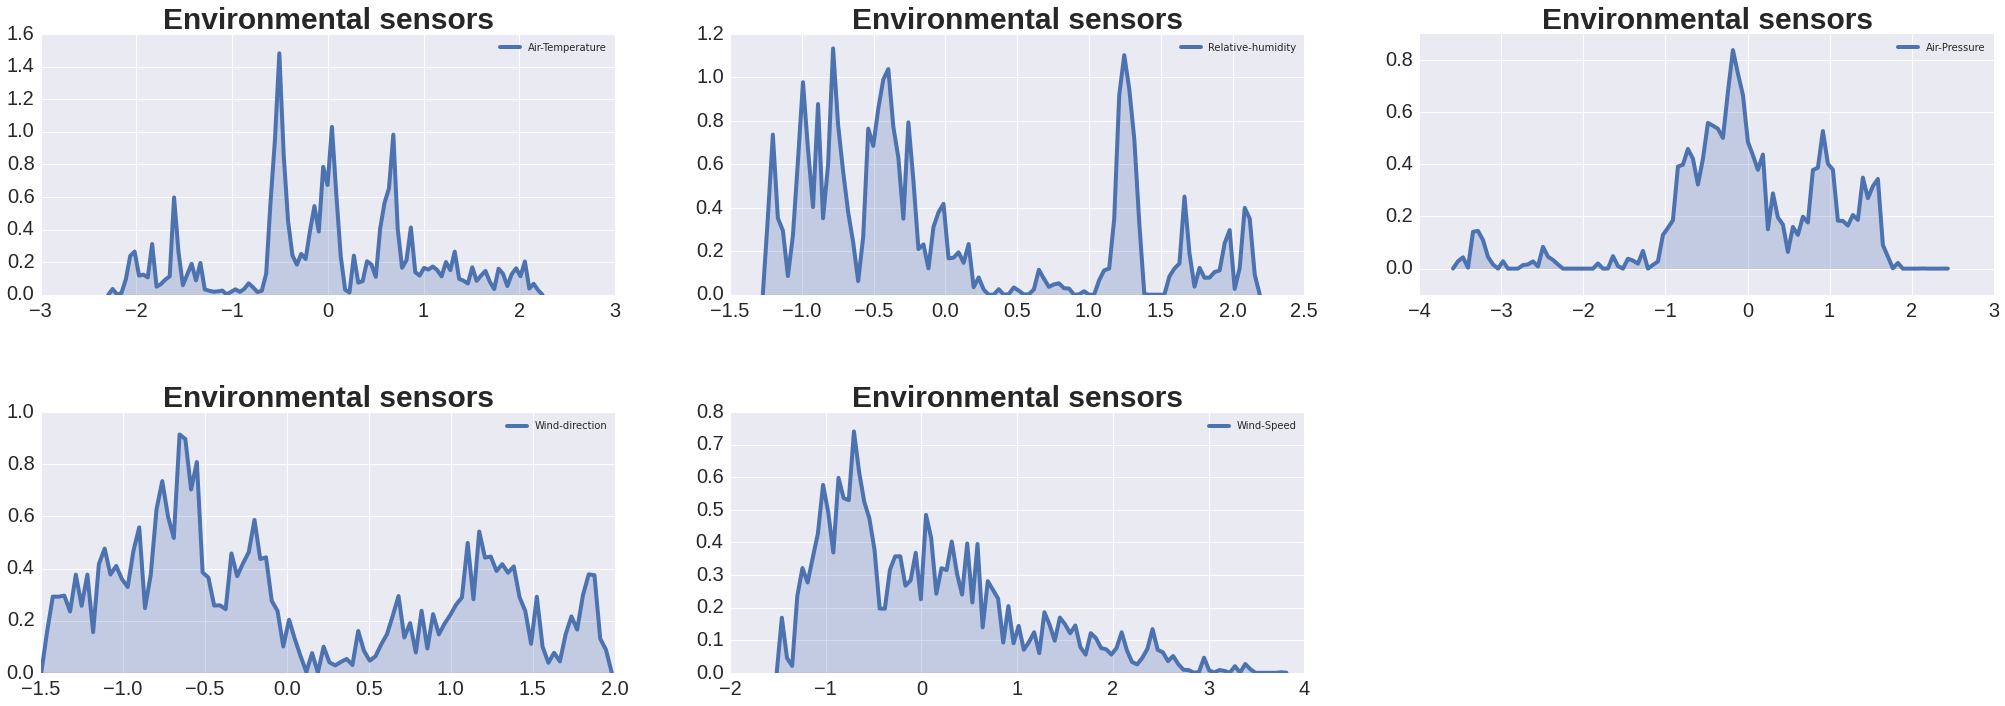

In [23]:
plt.figure(figsize=(35,25))
plt.subplots_adjust(hspace=0.45)
for i,cols in enumerate(data_f.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data_f[cols],shade=True,lw=4,bw=0.01)
    plt.title('Environmental sensors',fontsize=30, fontweight='bold')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.savefig('Distribution.eps')

In [22]:
import seaborn as sns
sns.set(color_codes=True)

In [92]:
cols_ant1

['Ant1RefractionEL',
 'Ant1PoitingEL',
 'Ant1ScanEL',
 'Ant1PointingAZ',
 'Ant1refractionAZ',
 'Ant1ScanAZ']

In [58]:
cols_ant1= [col for col in data_frame.columns if 'Ant1' in col]
cols_ant2= [col for col in data_frame.columns if 'Ant2' in col]
cols_ant3= [col for col in data_frame.columns if 'Ant3' in col]
cols_ant4= [col for col in data_frame.columns if 'Ant4' in col]
cols_ant5= [col for col in data_frame.columns if 'Ant5' in col]
cols_ant6= [col for col in data_frame.columns if 'Ant6' in col]
cols_ant7= [col for col in data_frame.columns if 'Ant7' in col]

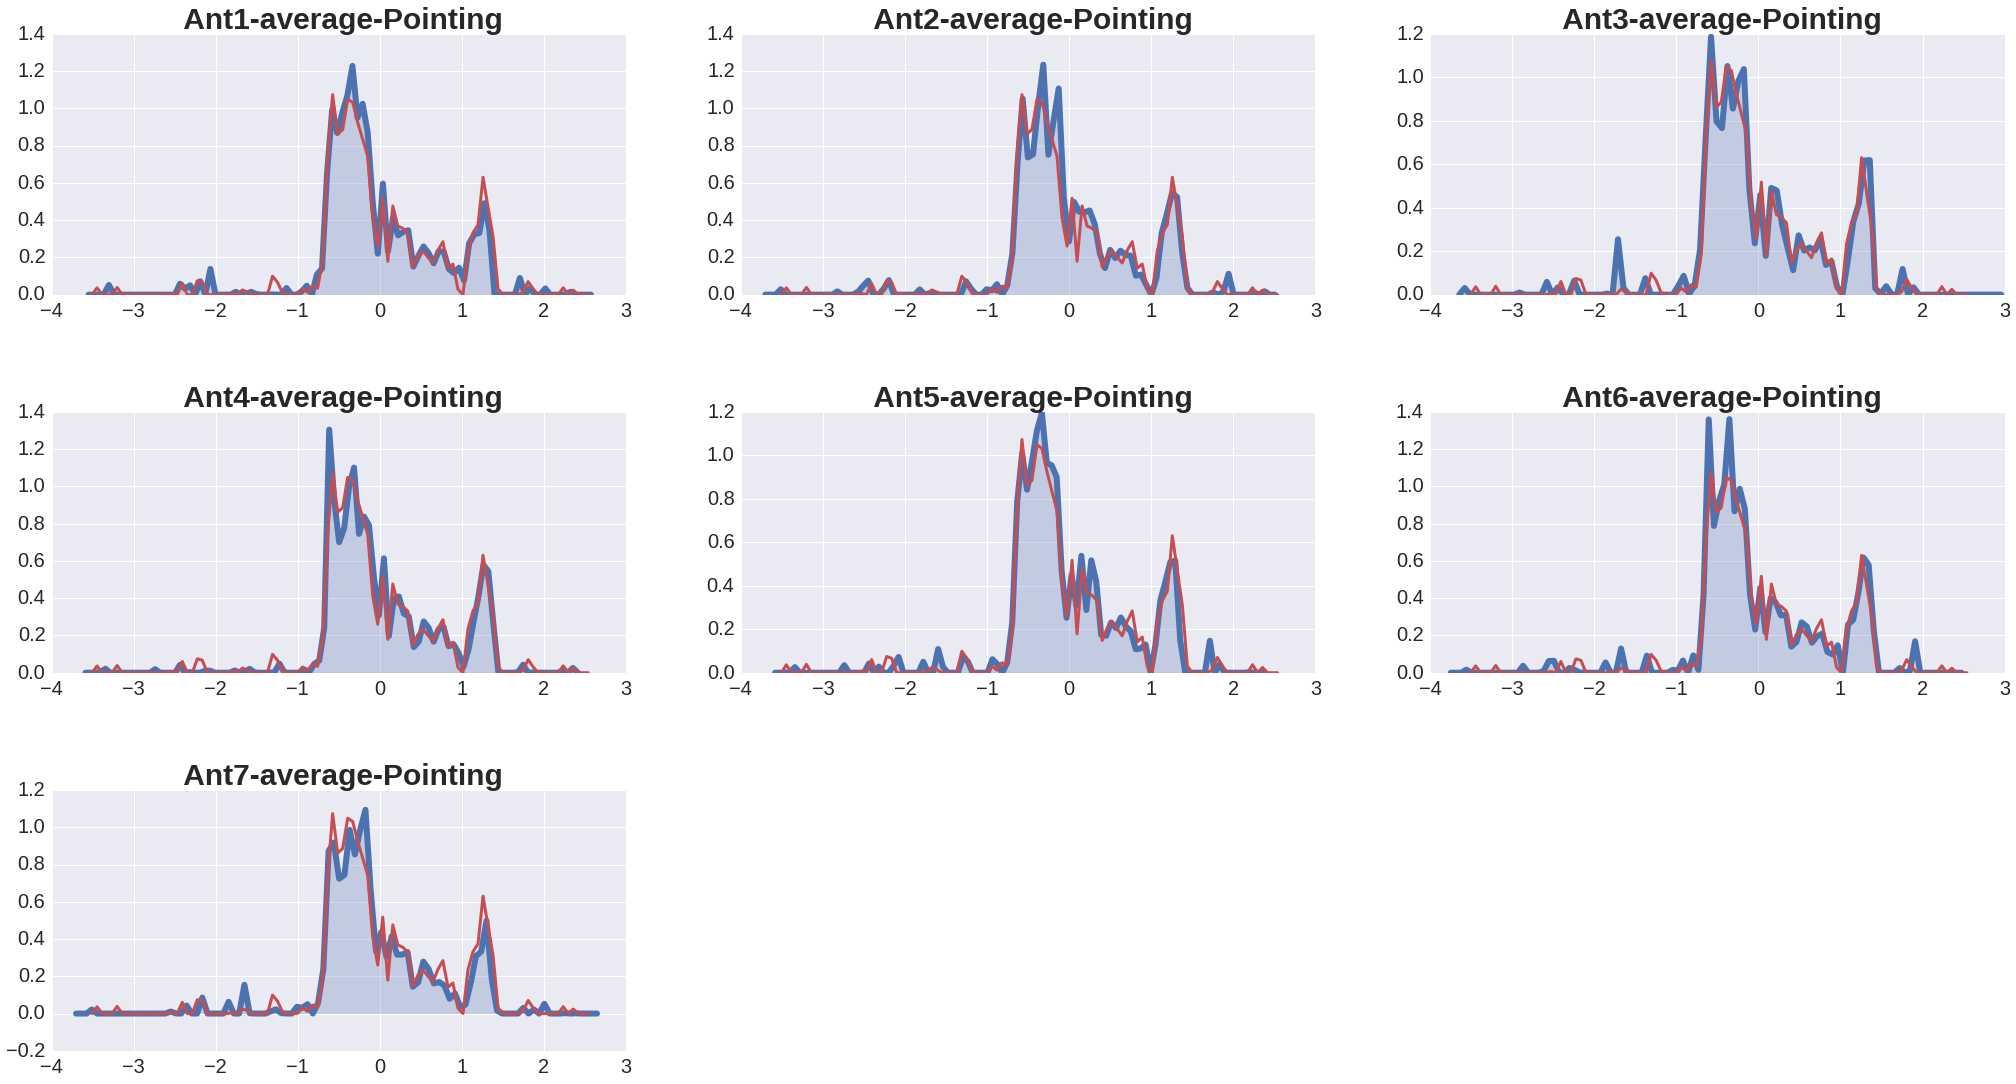

In [44]:
plt.figure(figsize=(35,25))
plt.subplots_adjust(hspace=0.45)
for i,cols in enumerate([cols_ant1,cols_ant2,cols_ant3,cols_ant4,cols_ant5,cols_ant6,cols_ant7]):
    plt.subplot(4,3,i+1)
    
    sns.kdeplot(data_frame[cols].mean(axis=1),shade=True,lw=6,bw=0.01)
    sns.kdeplot(big_D,lw=3,bw=0.01,color='r')
    plt.title(' Ant' + str(i+1) +'-'+'average'+'-'+'Pointing',fontsize=30, fontweight='bold')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.savefig('Distribution.eps')



In [47]:
from scipy.stats import entropy

In [63]:
entropy(big_D,data_frame[cols_ant4].mean(axis=1))

inf

In [56]:
t=np.ravel(data_frame[cols_ant1])

In [87]:
import numpy as np
from scipy.stats import entropy

def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p+1 / q), 0))

In [88]:
kl(big_D,data_frame[cols_ant4].mean(axis=1))

nan

In [86]:
big_D

0       0.679142
1      -0.372676
2      -0.386117
3      -0.096785
4      -0.205500
5      -0.008735
6      -0.537154
7      -0.363810
8      -0.280964
9      -0.614591
10     -0.648575
11     -0.312201
12      0.431766
13     -0.614134
14     -0.186542
15     -0.182065
16     -0.366659
17     -2.419293
18     -0.045009
19     -0.146379
20      1.297544
21      0.903996
22      0.074428
23     -0.270036
24     -0.289709
25     -0.139514
26      0.850536
27      0.872292
28      1.249158
29      0.617172
          ...   
1378   -0.112991
1379    0.221688
1380    0.328427
1381    1.392902
1382    1.315748
1383   -0.654655
1384   -0.149798
1385   -0.217679
1386   -0.348575
1387    1.299899
1388    0.047245
1389   -0.435682
1390   -0.405646
1391   -1.623962
1392   -0.376771
1393   -0.278572
1394    1.435753
1395    0.655937
1396   -0.555166
1397   -0.509591
1398   -0.536065
1399   -0.555556
1400   -0.164661
1401   -0.249612
1402    0.965881
1403   -0.611907
1404   -0.550610
1405   -0.6099

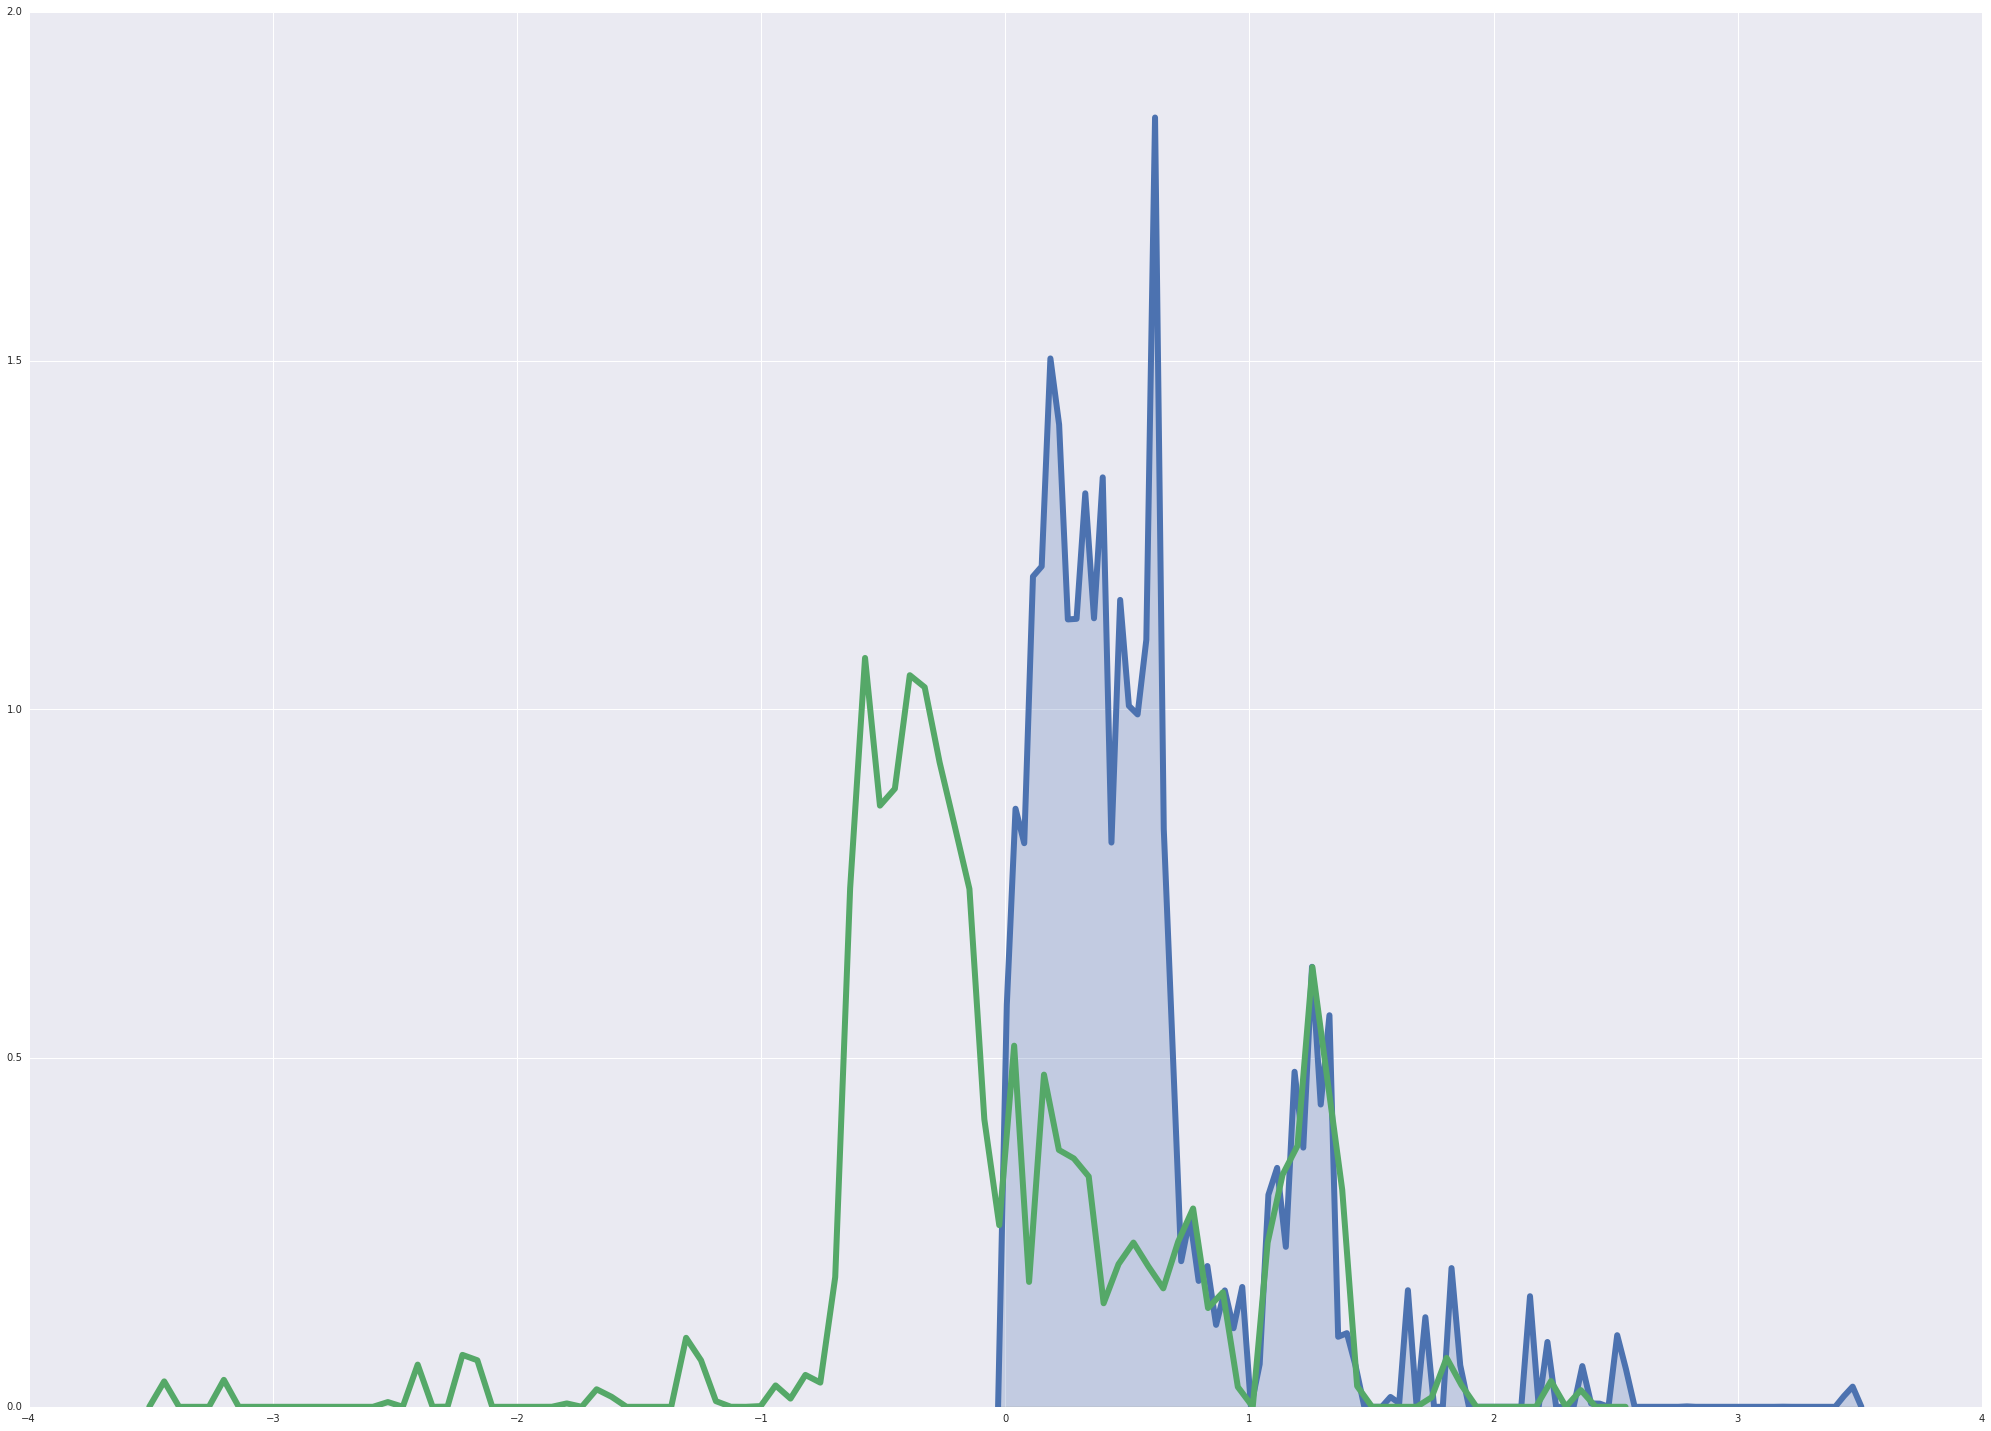

In [85]:
plt.figure(figsize=(35,25))
sns.kdeplot(abs(big_D),shade=True,lw=6,bw=0.01)
sns.kdeplot(big_D,lw=6,bw=0.01)
#sns.kdeplot(data_frame[cols_ant2].mean(axis=1),lw=4,bw=0.01)

In [45]:
>>> x = np.linspace(-15, 15, 9)
>>> stats.kstest(x, 'norm')

KstestResult(statistic=0.44435602715924361, pvalue=0.038850142705171065)

In [46]:
x

array([-15.  , -11.25,  -7.5 ,  -3.75,   0.  ,   3.75,   7.5 ,  11.25,  15.  ])

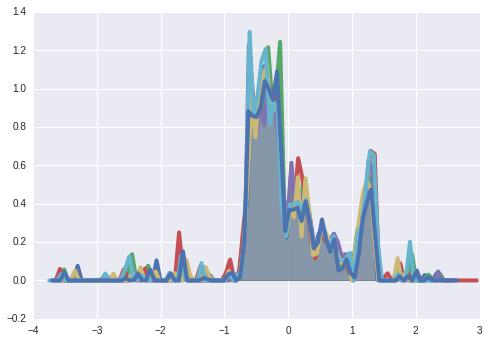

In [108]:
for i,cols in enumerate([cols_ant1,cols_ant2,cols_ant3,cols_ant4,cols_ant5,cols_ant6,cols_ant7]):
    sns.kdeplot(data_frame[cols].mean(axis=1),shade=True,lw=4,bw=0.01)

In [320]:
df =pd.DataFrame(Data_combined[:,:6], columns=['class','Air-Temperature', 'Relative-humidity', 'Air-Pressure', 'Wind-direction','Wind-Speed'])

In [336]:
define_color={1:'red',2:'blue'}

In [337]:
colors= df['class'].map(lambda x : define_color.get(x+1))

[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

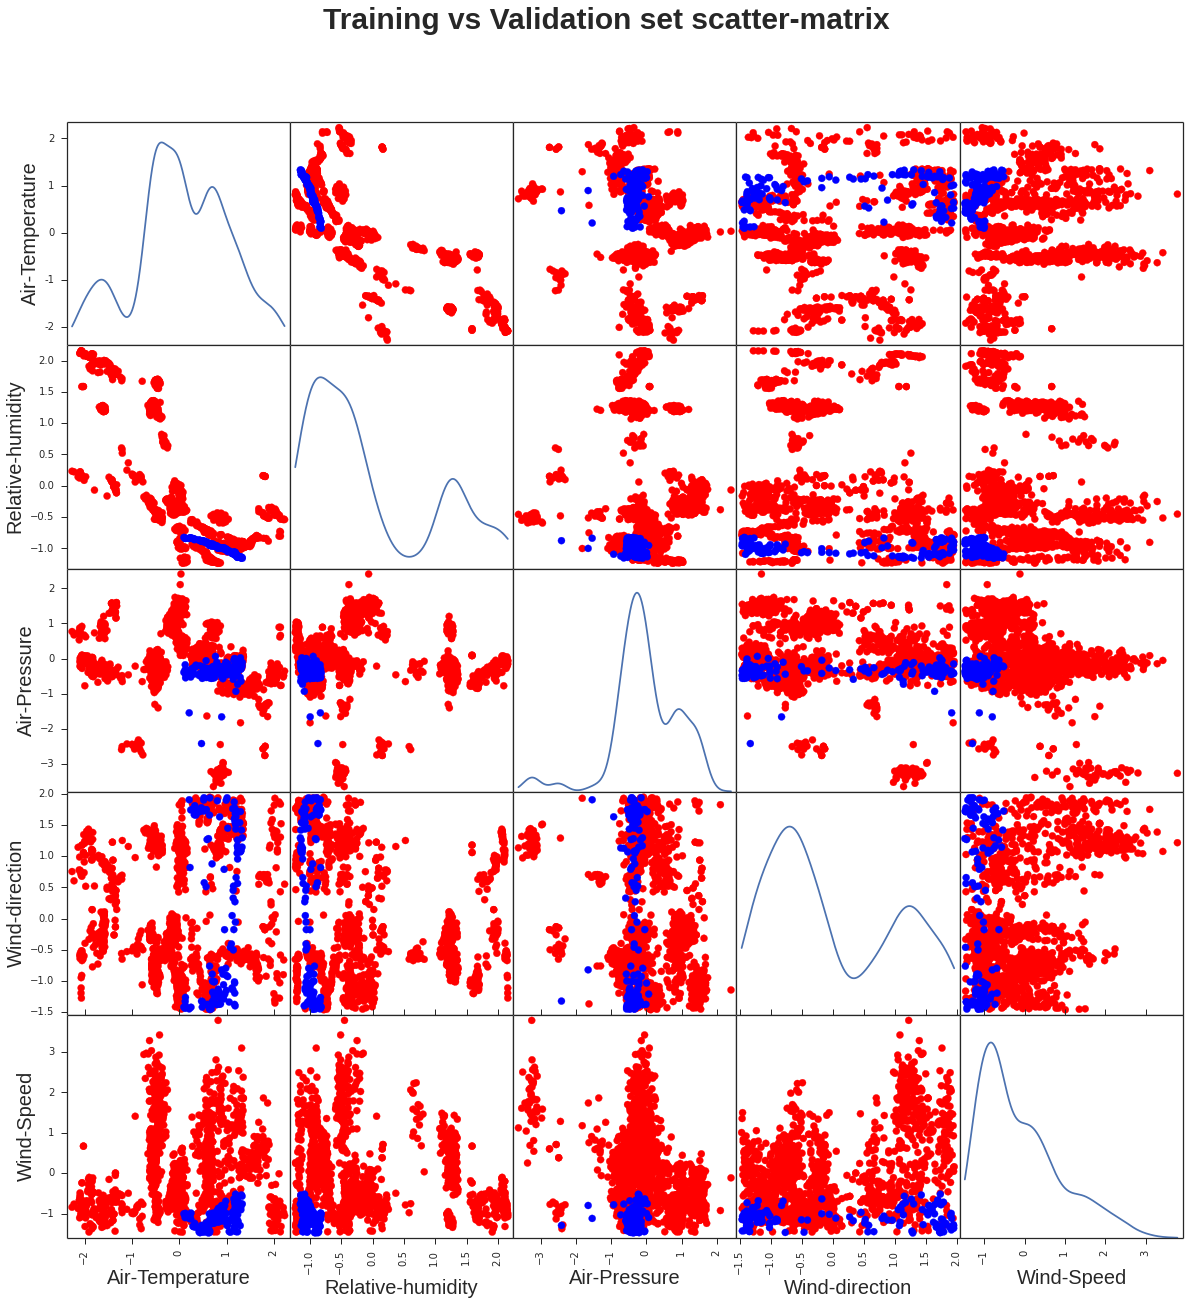

In [347]:
Axes=scatter_matrix(df.iloc[:,1:], figsize=(20, 20), diagonal='kde',marker="o",s=50,alpha=1,color=colors)
plt.suptitle('Training vs Validation set scatter-matrix',fontsize=30, fontweight='bold')
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in Axes.ravel()]



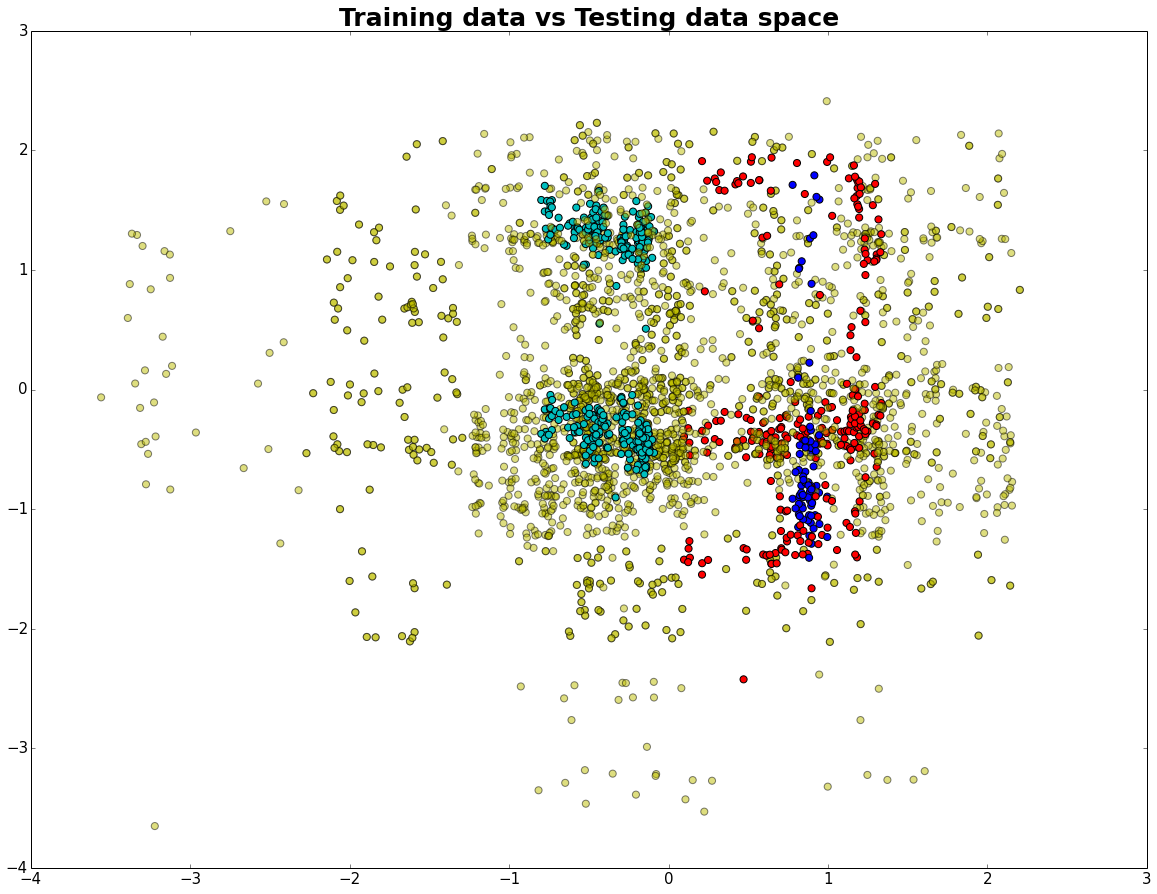

In [161]:

plt.figure(figsize=(20,15))
for i in range(2,np.shape(X_Train[:,1:5])[1]):
    scatter(X_Train[:,1],X_Train[:,i],c='y',marker="o",s=50,alpha=.5,label='Training data')
    scatter(Scaled_data[:,0],Scaled_data[:,i],c='r',marker="o",s=50,label='Test-1')
    scatter(Scaled_data1[:,0],Scaled_data1[:,i],c='b',marker="o",s=50,label='Test-2')
    scatter(Scaled_data2[:,0],Scaled_data2[:,i],c='c',marker="o",s=50,label='Test-3')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.title('Training data vs Testing data space',fontsize=25,fontweight='bold')
    #legend()


In [90]:

"""Load finilized models from disk"""
Decision_tree=pickle.load(open('finalized_DC.sav','rb'))
Random_forest=pickle.load(open('finalized_RF.sav','rb'))
KNN=pickle.load(open('finalized_KNN.sav','rb'))
EXT_tree=pickle.load(open('finalized_EXT.sav','rb'))

In [91]:
YMultreg=Decision_test(Scaled_data)[0]
RandomForest=Random_test(Scaled_data)[0]
EXT=EXT_test(Scaled_data)[0]
KNN=KNN_test(Scaled_data)[0]

In [92]:
Average_all=YMultreg+RandomForest+EXT+KNN/4

In [97]:
Average_tree=YMultreg+RandomForest+EXT/3

In [98]:
Average_ensemble=RandomForest+EXT/2

In [99]:
Average_all

array([[ 0.27781284,  0.20192361,  0.27132102, ..., -3.71326089,
         0.2933873 , -1.7077359 ],
       [ 0.26160755,  0.24069977,  0.25631189, ..., -4.28935133,
         0.27943735, -2.57493622],
       [ 0.27078504, -1.18580336,  0.26513859, ..., -2.31285214,
         0.27931339,  0.12009762],
       ..., 
       [ 0.27078823, -0.80846911,  0.28183483, ..., -2.15406714,
         0.28725054,  2.2476593 ],
       [ 0.26520292, -0.48162927,  0.28240183, ..., -0.44473876,
         0.28594048,  3.24627926],
       [ 0.29389319, -2.48174919,  0.30070654, ..., -0.37154342,
         0.30377775,  2.8922232 ]])

In [100]:
Average_ensemble

array([[ 0.1370402 , -0.25506803,  0.13496142, ..., -1.49643682,
         0.14298273, -0.07690942],
       [ 0.12492159, -0.22650412,  0.12371529, ..., -1.92831906,
         0.13256971, -0.72782941],
       [ 0.12913424, -0.41825332,  0.12600738, ..., -1.75895259,
         0.13314813, -0.13119153],
       ..., 
       [ 0.13566075, -0.83285801,  0.13533726, ..., -1.16237724,
         0.13768094,  0.8678437 ],
       [ 0.13156879, -0.77122519,  0.13577902, ...,  0.14867734,
         0.13631678,  1.79679746],
       [ 0.13489545, -1.21879443,  0.13826889, ..., -0.56541356,
         0.13982436,  1.35387248]])

In [101]:
Average_tree

array([[ 0.19752573,  0.44885356,  0.19217697, ..., -3.12363418,
         0.20956111, -1.67720764],
       [ 0.18675363,  0.47424371,  0.18218041, ..., -3.50752951,
         0.20030509, -2.25580319],
       [ 0.19504146, -0.59590246,  0.19069751, ..., -1.54434305,
         0.20034089,  0.13469049],
       ..., 
       [ 0.18713583, -0.16807719,  0.19708665, ..., -1.76418593,
         0.20213437,  1.38275182],
       [ 0.18349853, -0.11329246,  0.19747933, ..., -0.59880409,
         0.20092178,  2.2084885 ],
       [ 0.21019304, -1.75722712,  0.21533489, ..., -0.30822456,
         0.21770203,  1.72768346]])

In [93]:
Average_all.shape,Matrix.shape

((46, 28), (56, 28))

In [ ]:
FeatureSpce=["AirTemperature", "RelativeH" , "AirPressure", "WindDirection","WindSpeed","Ant1RefractionEL"
                  ,"Ant2refractionEL","Ant3refractionEL","Ant4refractionEL","Ant5refractionEL","Ant6refractionEL","Ant7refractionEL"
                  ,"Ant1PoitingEL","Ant2PoitingEL","Ant3PoitingEL","Ant4PoitingEL","Ant5PoitingEL","Ant6PoitingEL"
                  ,"Ant7PoitingEL","Ant1ScanEL","Ant2ScanEL","Ant3ScanEL","Ant4ScanEL","Ant5ScanEL","Ant6ScanEL"
                 ,"Ant7ScanEL","Ant1PointingAZ","Ant2PointingAZ","Ant3PointingAZ","Ant4PointingAZ","Ant5PointingAZ","Ant6PointingAZ"
                 ,"Ant7PointingAZ","Ant1refractionAZ","Ant2refractionAZ","Ant3refractionAZ","Ant4refractionAZ","Ant5refractionAZ","Ant6refractionAZ"
                 ,"Ant7refractionAZ","Ant1ScanAZ","Ant2ScanAZ","Ant3ScanAZ","Ant4ScanAZ","Ant5ScanAZ","Ant6ScanAZ"
                 ,"Ant7ScanAZ"]


In [70]:
#RF Feature space
#RF2=Random_forest.best_estimator_
#RF2.fit(X_train,Y_train)
#RF Feature space
RF2=Random_forest.best_estimator_
RF2.fit(X_Train[:,1:],Y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=700, n_jobs=1, oob_score=0, random_state=0,
           verbose=0, warm_start=False)

In [72]:
RF3=EXT_tree.best_estimator_

In [73]:
RF3.fit(X_Train[:,1:],Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=90,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=3,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=700, n_jobs=1, oob_score=0, random_state=0,
          verbose=0, warm_start=False)

In [77]:
importances = RF3.feature_importances_
%pylab inline`

Populating the interactive namespace from numpy and matplotlib


Feature ranking:
1. feature 1 (0.227426)
2. feature 2 (0.166364)
3. feature 0 (0.165645)
4. feature 3 (0.153760)
5. feature 4 (0.039295)
6. feature 17 (0.007987)
7. feature 15 (0.007611)
8. feature 9 (0.007320)
9. feature 25 (0.007291)
10. feature 20 (0.007176)
11. feature 16 (0.007094)
12. feature 18 (0.007026)
13. feature 7 (0.006857)
14. feature 22 (0.006770)
15. feature 11 (0.006728)
16. feature 8 (0.006680)
17. feature 23 (0.006614)
18. feature 21 (0.006599)
19. feature 19 (0.006476)
20. feature 12 (0.006458)
21. feature 24 (0.006451)
22. feature 13 (0.006435)
23. feature 14 (0.006325)
24. feature 6 (0.006198)
25. feature 42 (0.006096)
26. feature 36 (0.006050)
27. feature 10 (0.005964)
28. feature 5 (0.005836)
29. feature 29 (0.005678)
30. feature 27 (0.005647)
31. feature 34 (0.005430)
32. feature 26 (0.005420)
33. feature 37 (0.005419)
34. feature 31 (0.005384)
35. feature 30 (0.005047)
36. feature 28 (0.004962)
37. feature 38 (0.004952)
38. feature 32 (0.004812)
39. feature 35

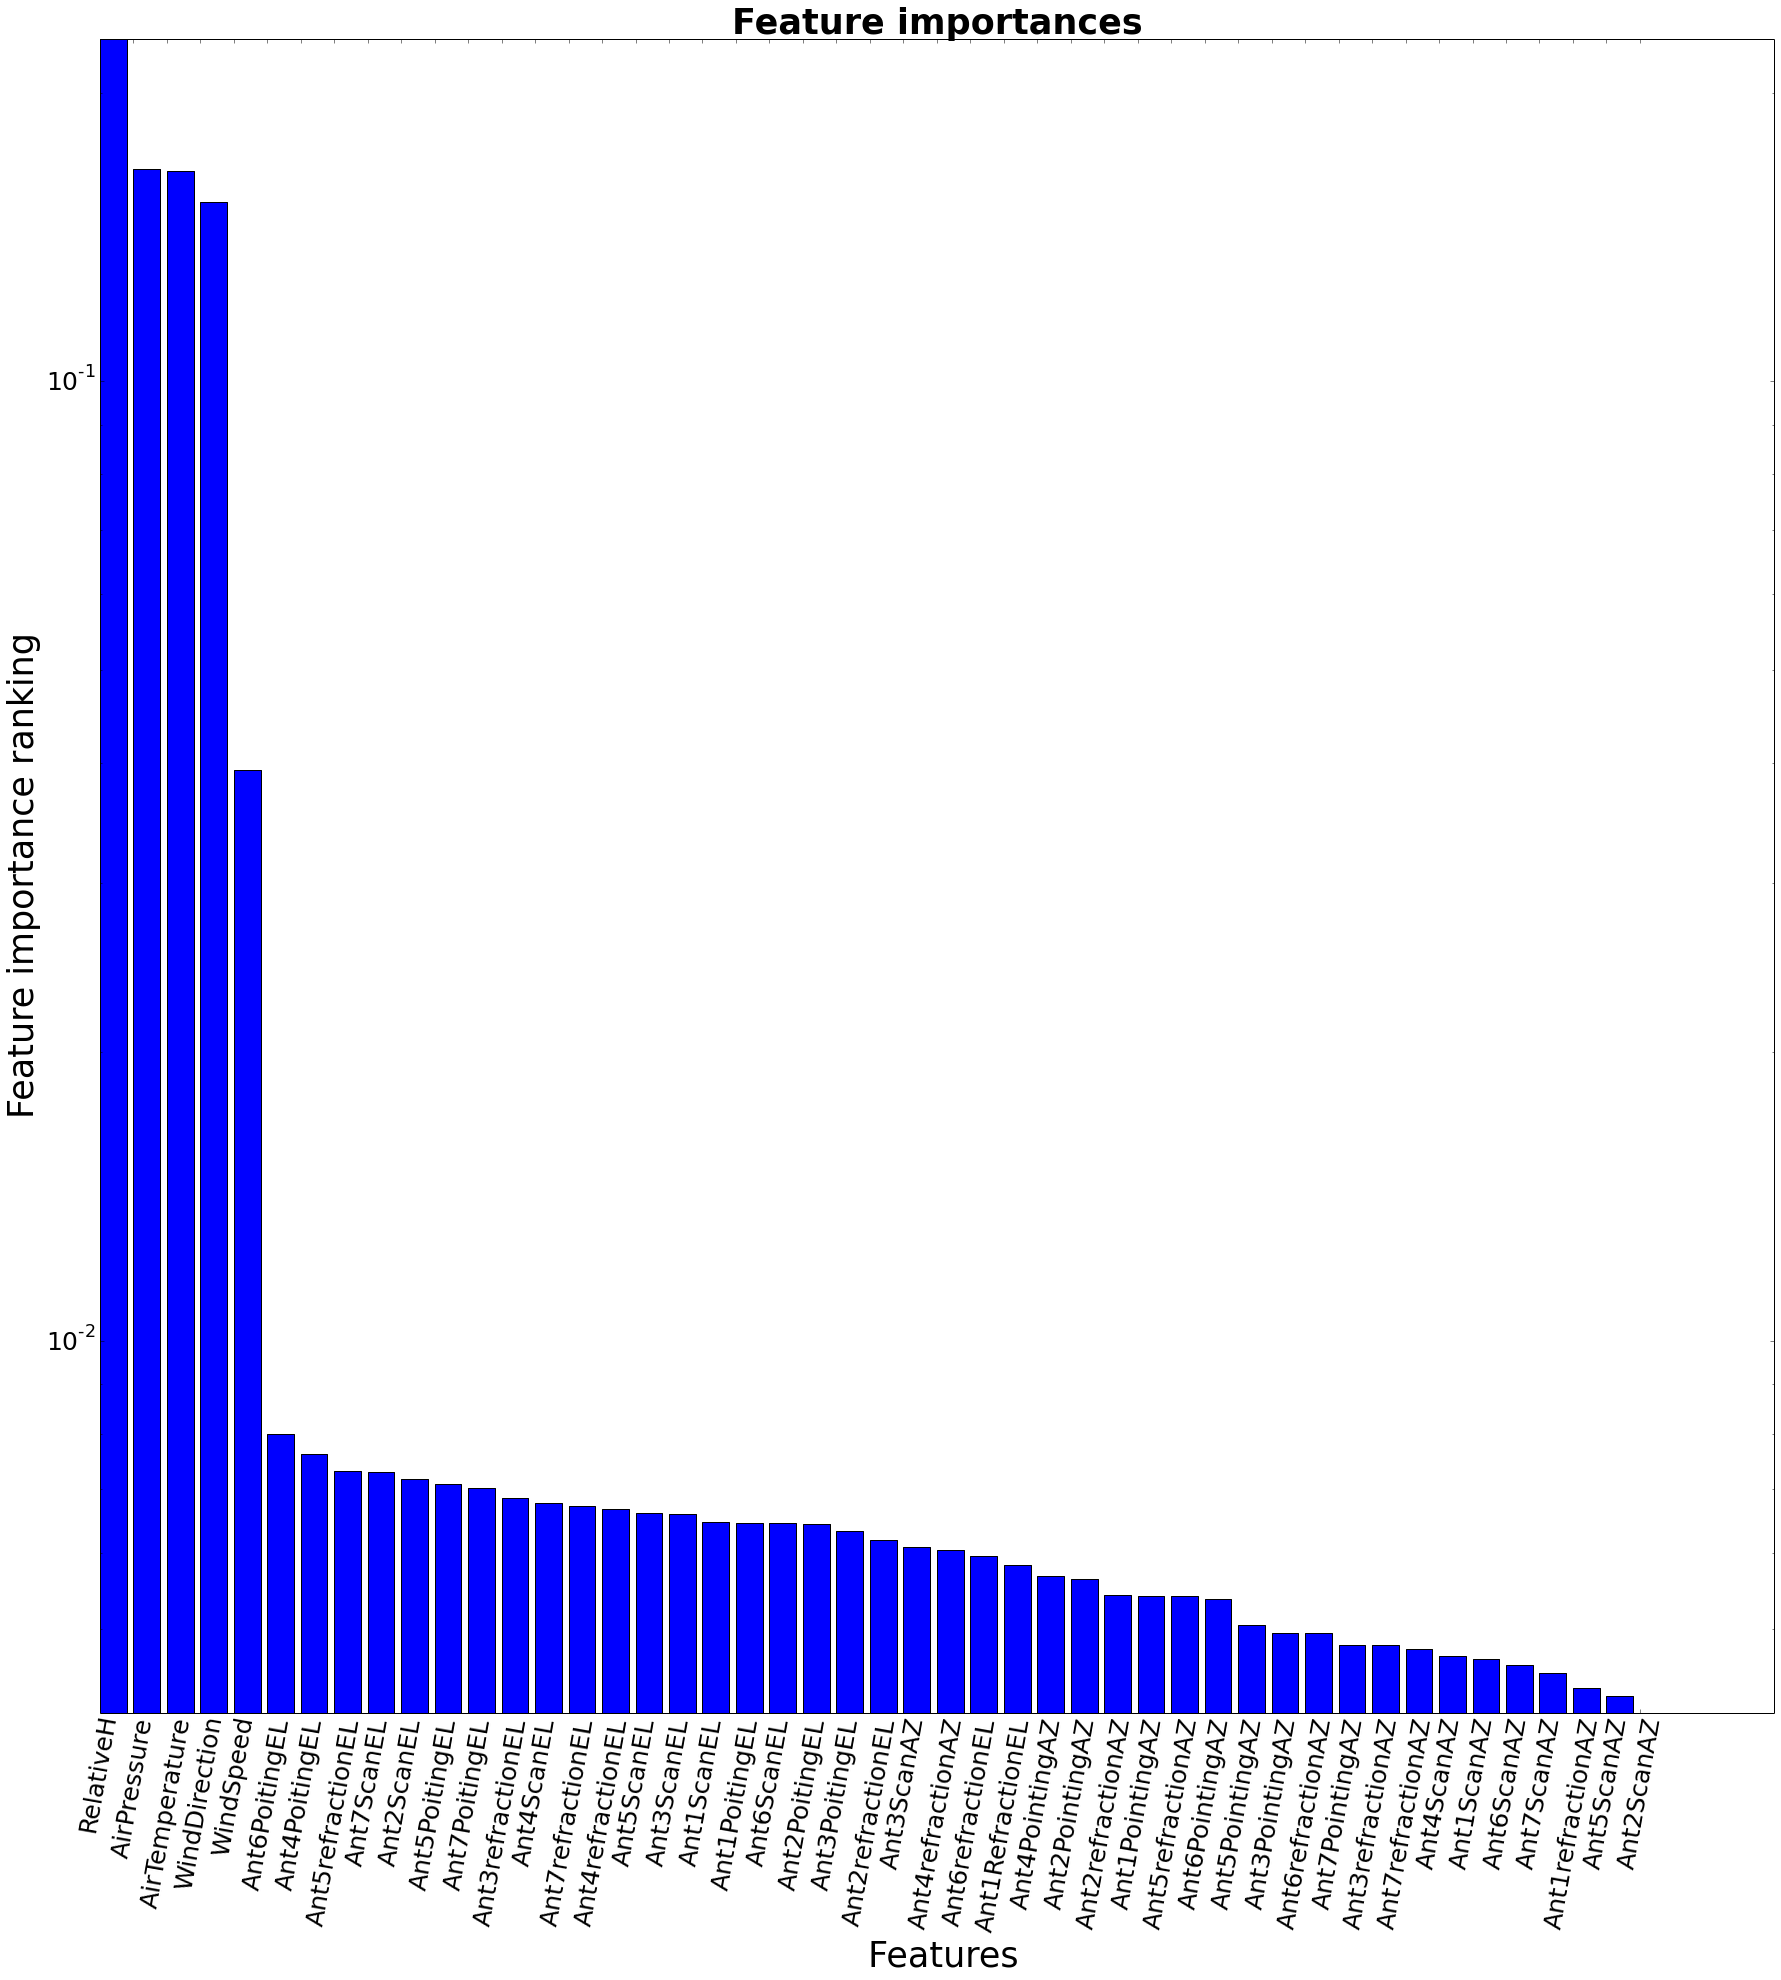

In [87]:
std = np.std([tree.feature_importances_ for tree in RF3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#Print the feature ranking
print("Feature ranking:")
FSpace=[]
for f in range(X_Test[:,1:].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    FSpace.append(FeatureSpce[indices[f]])
# Plot the feature importances of the forest
plt.figure(figsize=(30,30))
plt.title("Feature importances ",fontsize=35, fontweight='bold')
plt.bar(range(X_Train[:,1:].shape[1])[:], (importances[indices][:]),
       color="b", align="edge",label='Sensor data')
plt.xlabel(" Features",fontsize=35)
plt.ylabel("Feature importance ranking",fontsize=35)
plt.yscale("log", nonposy='clip')
plt.xticks(range(X_Train[:,1:].shape[1])[:],  FSpace[:],rotation=80,fontsize=25)
plt.yticks(size=25)
plt.ylim(min(importances[indices][:]),max(importances[indices][:]))
#plt.ylim(min(importances[indices][6:]),max(importances[indices][6:]))
#plt.legend(fontsize=20, fancybox=True, shadow=True)
plt.savefig('FeatureSpace.eps')
plt.show()

In [86]:
max(range(X_Train[:,1:].shape[1])[:])
max(importances[indices][:])

0.22742568145426606

In [17]:
#Hacky, its time to hack now ,change Y
x=range(Matrix.shape[1])
x2=x[:-14] #HH
x3=x[-14:] #VV 
odd=x2[1::2] #HH, where odd is an index position of phase and even is index position of 
                             #amplitude in the main matrix 
even=x2[::2]  #HH
odd1=x3[1::2] #VV
even1=x3[::2] #VV

In [76]:
print Matrix1

[[  1.40054569e-01   1.49162069e-01   5.95206860e-03 ...,   1.47439823e-01
    1.48877636e-01   1.48490906e-01]
 [  1.40788010e+02   1.31262848e+02  -8.44303207e+01 ...,   1.19802040e+02
    1.24990593e+02   1.23954346e+02]
 [  1.49775207e-01   1.48564190e-01   8.22540664e-04 ...,   1.57258317e-01
    1.61168680e-01   1.53402597e-01]
 ..., 
 [  1.37670761e+02   1.25160461e+02  -7.62357616e+00 ...,   1.33356522e+02
    1.40731781e+02   1.42614609e+02]
 [  1.26144484e-01   1.40256703e-01   6.66364213e-04 ...,   1.43442228e-01
    1.45193011e-01   1.44243196e-01]
 [ -4.66663933e+00  -1.32042074e+01   5.47445908e+01 ...,  -1.05458269e+01
   -4.48827362e+00   1.32633722e+00]]


In [107]:
#if model > mat:
 #diff on model
    #plot here 
    #else:
    #diff on mat 

In [115]:
164-156

8

In [108]:
#Now what happens if we have more solutions than sensors, add zeros/nan on sensors? 

In [103]:
EXT.shape, Matrix.shape

((164, 28), (156, 28))

In [129]:
from sklearn.metrics import mean_squared_error

In [108]:
#Reconstructed Gain Phase and Amplitude From Prediction matrix 
#We use euler's identity Ae^{j*a}, where a is Phase and A is amplitude 

Amphh = [Average_ensemble[:,:].transpose()[even[i],:] for i in range(len(even))]  #Reconstructing Amplitude hh
Ampvv =[Average_ensemble[:,:].transpose()[even1[i],:] for i in range(len(even1))] #Reconstructing Amplitude vv
Phasehh =[Average_ensemble[:,:].transpose()[odd[i],:] for i in range(len(odd))]   #Reconstructing phase hh in radians
Phasevv =[Average_ensemble[:,:].transpose()[odd1[i],:] for i in range(len(odd1))] #Reconstructing phase vv in radian

NewPhaseHH=[Amphh[j]*np.exp(1j*Phasehh[j]) for j in range(np.shape(Phasehh)[0])] # Converting radians to a+bj hh
NewPhaseVV=[Ampvv[j]*np.exp(1j*Phasevv[j]) for j in range(np.shape(Phasevv)[0])] # Converting radians to a+bj vv

DegPhaseHH2=np.angle(NewPhaseHH,deg=True)
DegPhaseVV2=np.angle(NewPhaseVV,deg=True)
Amp1=np.abs(NewPhaseHH)
Amp2=np.abs(NewPhaseVV)



In [78]:

Gsolution_res=np.zeros_like(Gsolutions)
i = 0
k = 0
while i < len(GsolutionsHH) :
    #Note that this is made for only 7 antennas (Kat-7), to be implemented for MeerKat later 
    Gsolution_res[i,0,0]=NewPhaseHH[0][k]
    Gsolution_res[i,0,1]=NewPhaseVV[0][k]
    Gsolution_res[i+1,0,0]=NewPhaseHH[1][k]
    Gsolution_res[i+1,0,1]=NewPhaseVV[1][k]
    Gsolution_res[i+2,0,0]=NewPhaseHH[2][k]
    Gsolution_res[i+2,0,1]=NewPhaseVV[2][k]
    Gsolution_res[i+3,0,0]=NewPhaseHH[3][k]
    Gsolution_res[i+3,0,1]=NewPhaseVV[3][k]
    Gsolution_res[i+4,0,0]=NewPhaseHH[4][k]
    Gsolution_res[i+4,0,1]=NewPhaseVV[4][k]
    Gsolution_res[i+5,0,0]=NewPhaseHH[5][k]
    Gsolution_res[i+5,0,1]=NewPhaseVV[5][k]
    Gsolution_res[i+6,0,0]=NewPhaseHH[6][k]
    Gsolution_res[i+6,0,1]=NewPhaseVV[6][k]
    k=k+1
    i = i+7

In [79]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


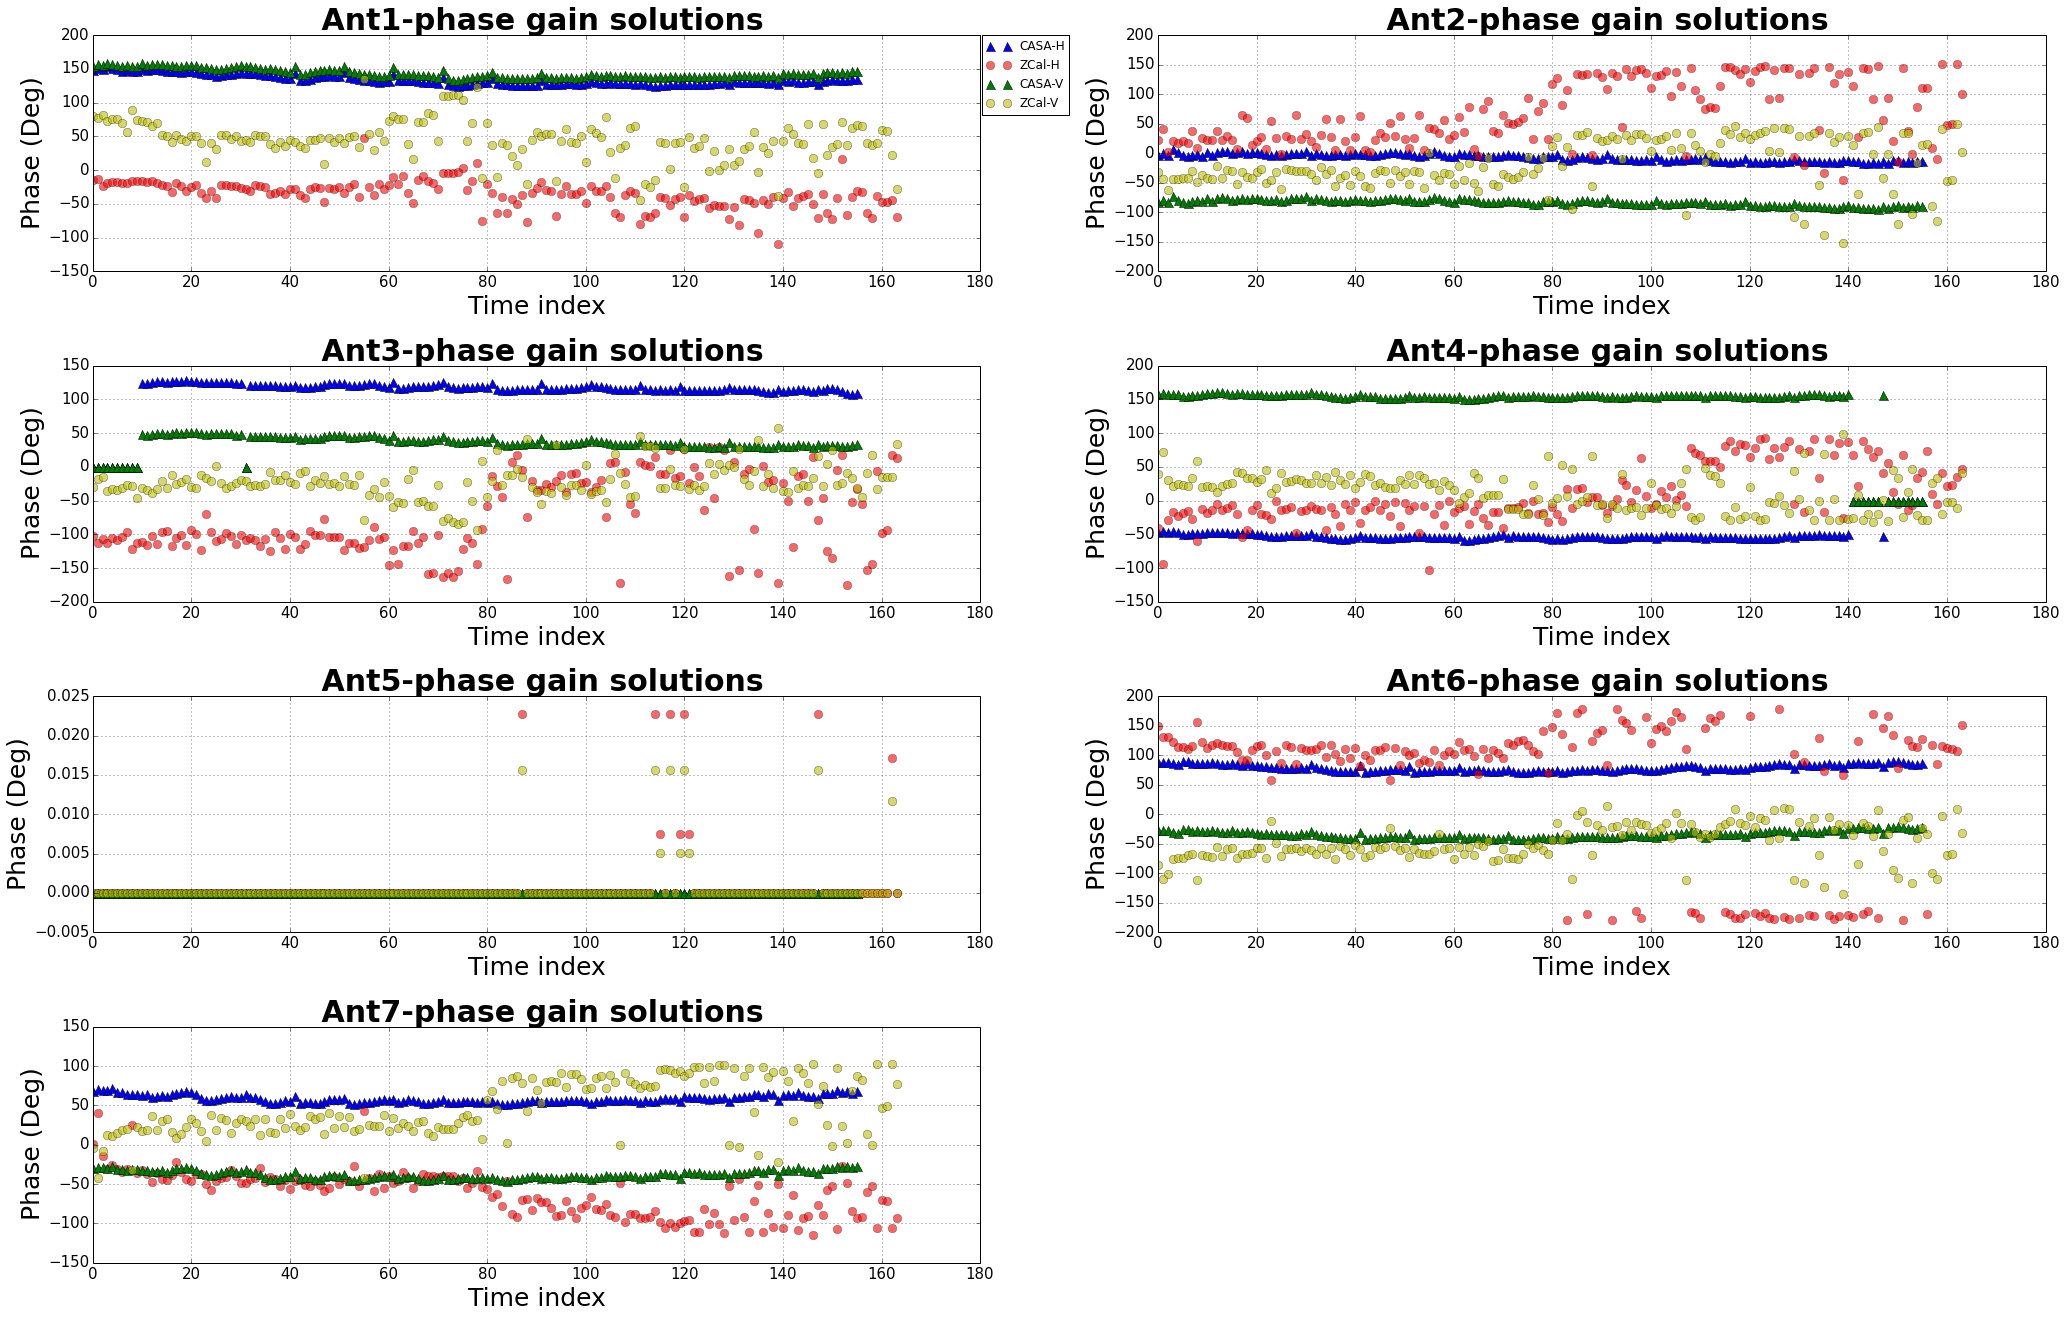

In [116]:
plt.figure(figsize=(35,22))
plt.subplots_adjust(hspace=0.45)
for i in range(shape(NewPhaseHH)[0]):
    plt.subplot(4,2,i+1)
    subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.4)
    plt.plot(Matrix[:,odd[i]],'b^', markersize=9,label="CASA-H")
    plt.plot(DegPhaseHH2[i,:],'ro', markersize=8,alpha=0.6,label="ZCal-H")
    plt.plot(Matrix[:,odd1[i]],'g^', markersize=9,label="CASA-V")
    plt.plot(DegPhaseVV2[i,:],'yo', markersize=8,alpha=0.6,label="ZCal-V")
    
    plt.title(' Ant' + str(i+1) +'-' 'phase gain solutions',fontsize=30, fontweight='bold')
    plt.ylabel('Phase (Deg)',fontsize=25)
    plt.xlabel('Time index',fontsize=25)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
plt.legend(bbox_to_anchor=(1.1,5.2), loc=1, borderaxespad=0.)
#plt.savefig('KNNPhasegain.eps')

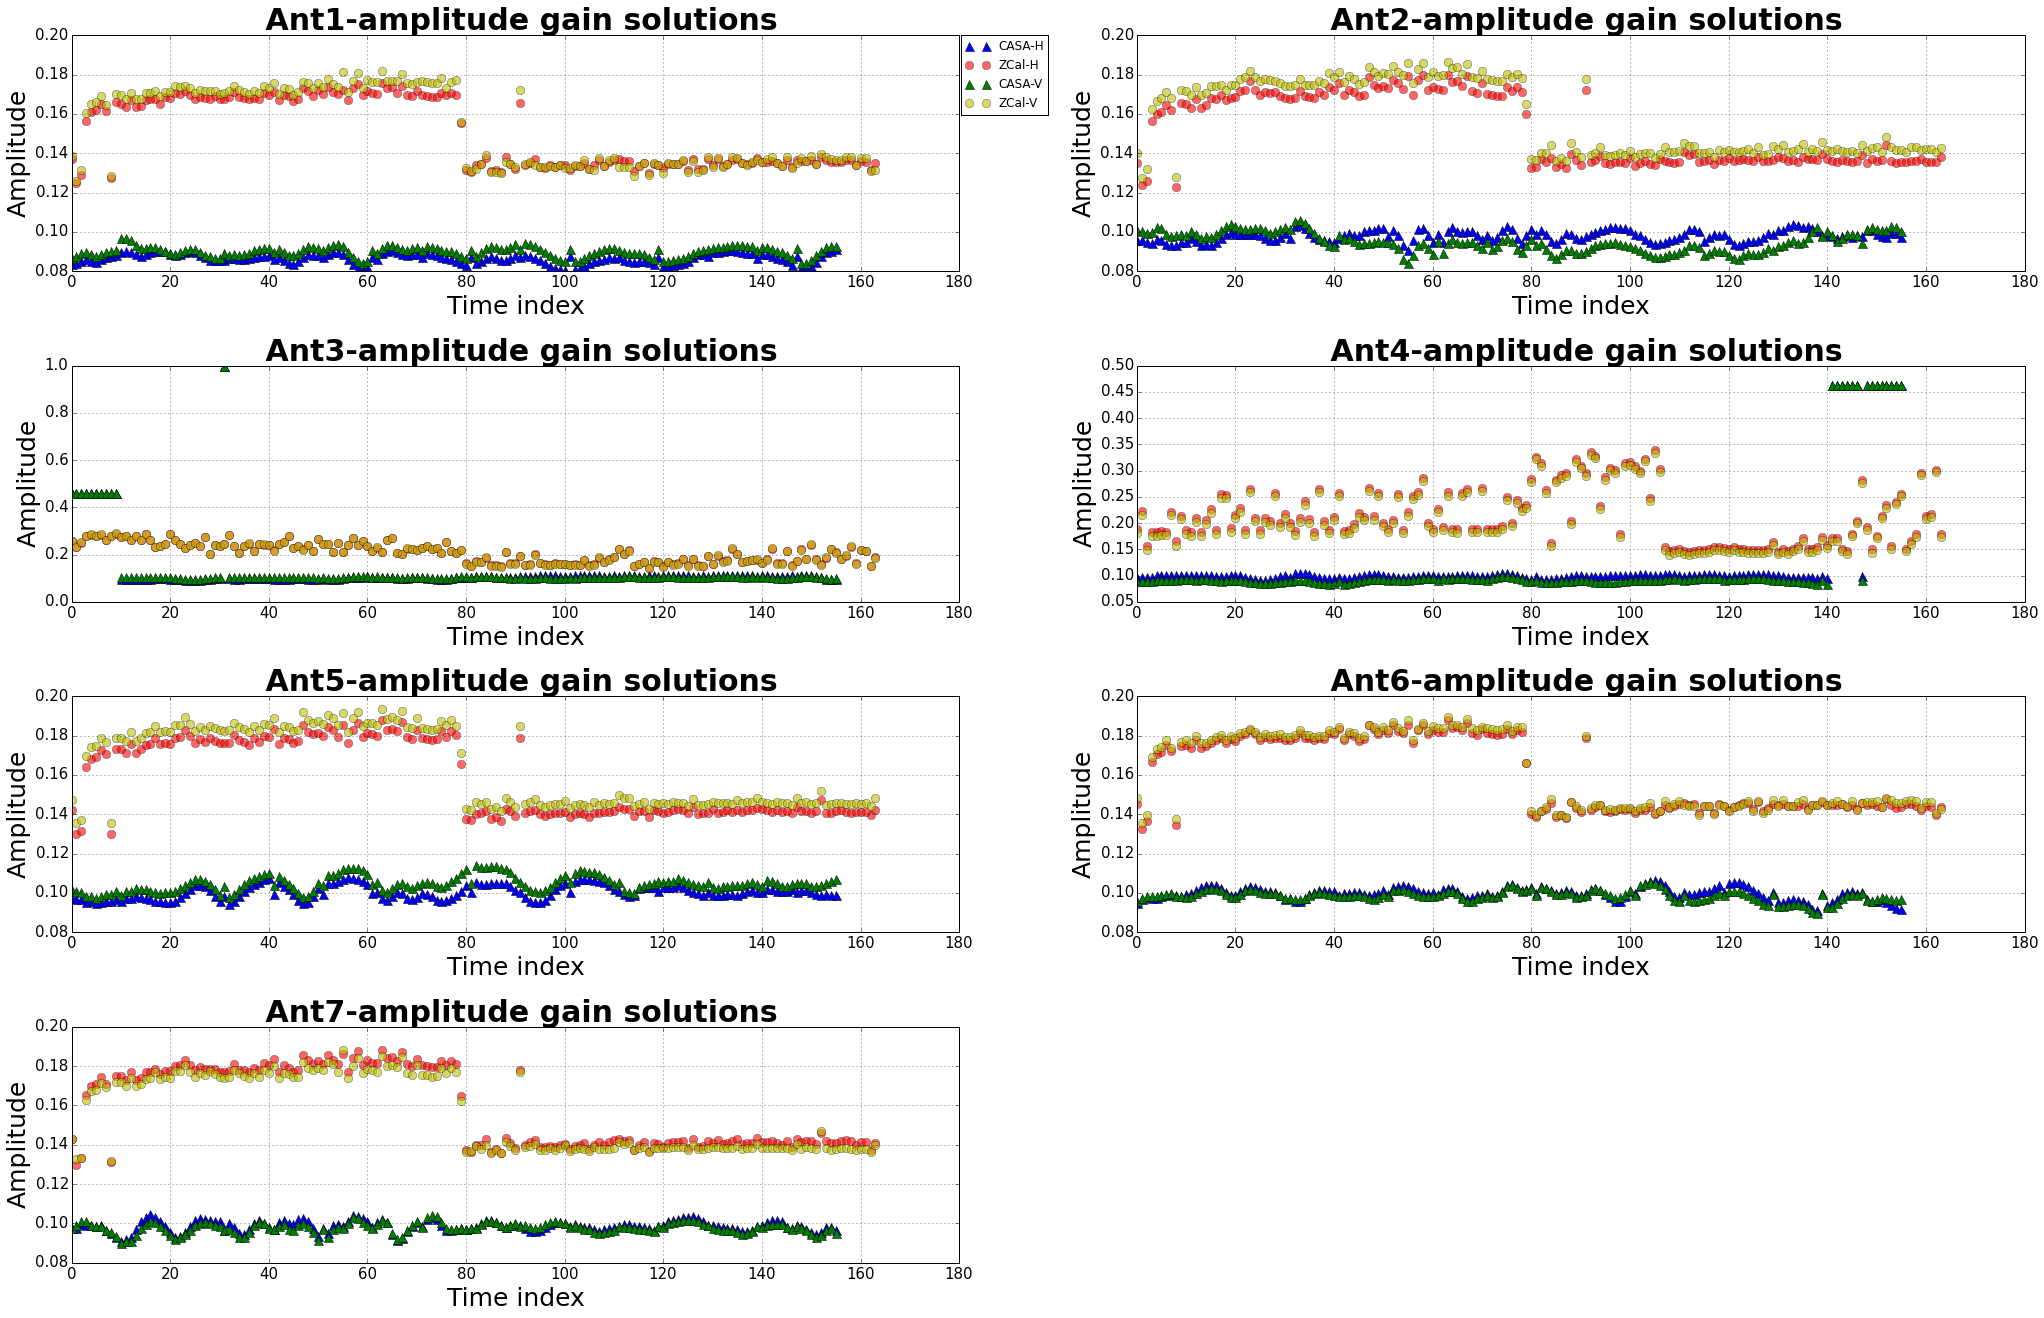

In [115]:


plt.figure(figsize=(35,22))
plt.subplots_adjust(hspace=0.45)
for i in range(shape(NewPhaseHH)[0]):
    plt.subplot(4,2,i+1)
    subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.4)
    plt.plot(Matrix[:,even[i]],'b^', markersize=9,label="CASA-H")
    plt.plot(Amp1[i,:],'ro', markersize=8,alpha=0.6,label="ZCal-H")
    plt.plot(Matrix[:,even1[i]],'g^', markersize=9,label="CASA-V")
    plt.plot(Amp2[i,:],'yo', markersize=8,alpha=0.6,label="ZCal-V")
    
    plt.title(' Ant' + str(i+1) +'-' 'amplitude gain solutions',fontsize=30, fontweight='bold')
    plt.ylabel('Amplitude',fontsize=25)
    plt.xlabel('Time index',fontsize=25)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
plt.legend(bbox_to_anchor=(1.1,5.2), loc=1, borderaxespad=0.)
#plt.savefig('KNNampgain.eps')

# Stats 

(903,)